In [68]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import os
import site
from pathlib import Path
path = Path(os.getcwd())
site.addsitedir(path.parent)  # Always appends to end
from utils.date2datetime import *
from datetime import datetime
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dict_converter = {
    'summary': 'object',
    'icon': 'object'
}
parser_dates = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M")

In [3]:
dir_folder = 'C:\\Users\\Lucas\\Documents\\GitHub\\Resources\\'
df_w = pd.read_csv(dir_folder + '2. Weather data\\training_set_weather_data.csv', \
                  dtype = dict_converter,
                  parse_dates=['Flight Datetime', 'AOBT', 'ATOT', 'time_hourly'],
                  date_parser=parser_dates)
display(df_w.head())
display(pd.read_csv('C:\\Data\\Hackathon\\Weather_data.csv').head())

,Flight Number,Flight Datetime,Aircraft Model,Aircraft Length,Aircraft Span,No. Engines,Airport Arrival/Departure,Movement Type,AOBT,ATOT,Distance_proxy_m,Log_distance_m,actual_taxi_out_sec,Year,Month,Weekday,Hour,N_dep_dep,N_dep_arr,Q_dep_dep,Q_dep_arr,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,DY2434,2015-01-01 06:00:00,B737-800 WINGLETS,39.50,35.70,2,TFS,D,2015-01-01 05:56:00,2015-01-01 06:05:00,3276.655443,8.094578,540,2015,1,3,6,3,2,0,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,EZY8869,2015-01-01 06:10:00,A320-100/200,56.70,60.00,2,AMS,D,2015-01-01 06:08:00,2015-01-01 06:18:00,2777.685343,7.929373,600,2015,1,3,6,6,1,1,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,EZY8462,2015-01-01 06:15:00,A320-100/200,37.56,34.09,2,GVA,D,2015-01-01 06:08:00,2015-01-01 06:19:00,2729.133359,7.911739,660,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,BA2632,2015-01-01 06:20:00,A320-100/200,37.56,34.09,2,ALC,D,2015-01-01 06:24:00,2015-01-01 06:36:00,2292.070065,7.737211,720,2015,1,3,6,9,2,5,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,EZY5381,2015-01-01 06:20:00,A319,33.84,34.09,2,MUC,D,2015-01-01 06:14:00,2015-01-01 06:27:00,3194.416489,8.069160,780,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


In [25]:


acchar_path = 'C:\\Data\\Hackathon\\1. AC characteristics\\ACchar.xlsx'
df_a = pd.read_excel(acchar_path, sheet_name='test', na_values = 'tbd', \
                     dtype = dict_converter_aircraft)
df['a'] = pd.to_numeric(df['a'], errors='coerce')
display(df_a.head())


ValueError: Unable to convert column Wingspan, ft to type <class 'numpy.float64'>

In [5]:
df_a['A320-100']

0                     Acro Sport
1                  Acro Sport II
2                         Cougar
3                     Junior Ace
4                      Super Ace
                  ...           
2759                   Zlin Z-50
2760          Zlin Z-526 Akrobat
2761    Zlin Z-526 Trener Master
2762                  Zlin Z-626
2763        Zlin Z-726 Universal
Name: A320-100, Length: 2764, dtype: object

In [271]:
df_geo = pd.read_csv('C:\\Data\\Hackathon\\geographic_data.csv')
display(df_geo.head())
#display(pd.read_csv('C:\\Data\\Hackathon\\geographic_data.csv').head())

,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand
0,RUNWAY_1,54.755307,-0.023040,stand_0,54.764575,0.000356
1,RUNWAY_2,54.757120,-0.024107,stand_1,54.764690,0.024353
2,RUNWAY_1,54.755307,-0.023040,stand_2,54.769141,0.011816
3,RUNWAY_1,54.755307,-0.023040,stand_3,54.772184,0.006803
4,RUNWAY_1,54.755307,-0.023040,stand_4,54.767007,0.008593


In [28]:
day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_apt_time = pd.read_csv('C:\\Data\\Hackathon\\0. Airport data\\training_set_airport_data.csv',\
                         parse_dates=['Flight Datetime', 'AOBT', 'ATOT'],
                         date_parser=parser_dates)
display(df_apt_time.head())
display(pd.read_csv('C:\\Data\\Hackathon\\training_set_airport_data.csv').head())

df_apt_time['Hour'] = df_apt_time['AOBT'].apply(lambda x: x.hour)
df_apt_time['Day'] = df_apt_time['AOBT'].apply(lambda x: day[x.weekday()])

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2


,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,1/1/2015 6:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,1/1/2015 6:10,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,1/1/2015 6:15,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,1/1/2015 6:20,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,1/1/2015 6:20,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2


In [124]:
df_apt_time.set_index('AOBT', inplace=True)


,Flight Datetime,Aircraft Model,ATOT,Stand,Runway
AOBT,,,,,
2015-01-01 05:56:00,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 06:05:00,STAND_62,RUNWAY_4
2015-01-01 06:08:00,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2015-01-01 06:30:00,2015-01-01 06:30:00,A319,2015-01-01 06:42:00,STAND_55,RUNWAY_4
2015-01-01 06:46:00,2015-01-01 06:50:00,A319,2015-01-01 06:54:00,STAND_67,RUNWAY_4
2015-01-01 06:54:00,2015-01-01 07:00:00,A321-100/200,2015-01-01 07:06:00,STAND_84,RUNWAY_4
...,...,...,...,...,...
2018-12-31 19:29:00,2018-12-31 19:30:00,A319,2018-12-31 19:39:00,STAND_137,RUNWAY_4
2018-12-31 19:42:00,2018-12-31 19:40:00,A319,2018-12-31 19:52:00,STAND_23,RUNWAY_4
2018-12-31 19:45:00,2018-12-31 19:50:00,A320-100/200,2018-12-31 19:56:00,STAND_55,RUNWAY_4


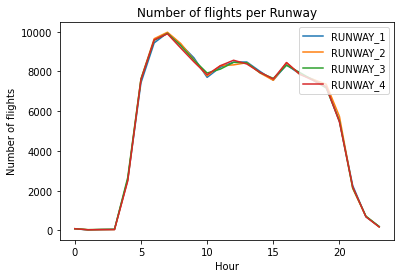

<AxesSubplot:xlabel='Hour', ylabel='ATOT'>

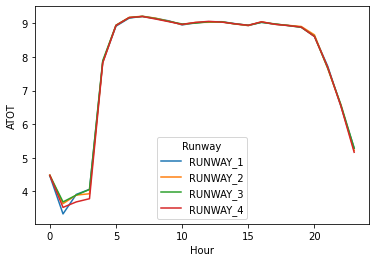

In [87]:
import seaborn as sns
op_plot_df = df_apt_time[['Hour', 'ATOT', 'Runway']].groupby(['Hour', 'Runway']).count().reset_index()
sns.lineplot(data=op_plot_df, x="Hour", y="ATOT", hue="Runway")
plt.title('Number of flights per Runway')
plt.ylabel('Number of flights')
plt.legend(loc='upper right')
plt.savefig('../../Resources/operation_plot.png')
plt.show()
op_plot_df['ATOT'] = np.log(op_plot_df['ATOT'])
sns.lineplot(data=op_plot_df, x="Hour", y="ATOT", hue="Runway")


In [88]:
op_plot_df

,Hour,Runway,ATOT
0,0,RUNWAY_1,4.465908
1,0,RUNWAY_2,4.488636
2,0,RUNWAY_3,4.477337
3,0,RUNWAY_4,4.477337
4,1,RUNWAY_1,3.332205
...,...,...,...
91,22,RUNWAY_4,6.538140
92,23,RUNWAY_1,5.293305
93,23,RUNWAY_2,5.214936
94,23,RUNWAY_3,5.283204


In [200]:
df_apt_time['ATOT'].dt.date == np.datetime64('2015-01-01')

0          True
1          True
2          True
3          True
4          True
          ...  
543808    False
543809    False
543810    False
543811    False
543812    False
Name: ATOT, Length: 543813, dtype: bool

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Hour,Day
Runway,,,,,,,
RUNWAY_1,0.249639,0.249639,0.249639,0.249639,0.249639,0.249639,0.249639
RUNWAY_2,0.250776,0.250776,0.250776,0.250776,0.250776,0.250776,0.250776
RUNWAY_3,0.250047,0.250047,0.250047,0.250047,0.250047,0.250047,0.250047
RUNWAY_4,0.249538,0.249538,0.249538,0.249538,0.249538,0.249538,0.249538


In [40]:
df_apt_time['Taxiing'] = (df_apt_time['ATOT'] - df_apt_time['AOBT']).dt.seconds/60

In [41]:
df_apt_time[['Runway', 'Stand', 'Taxiing']].groupby('Runway').mean()

,Taxiing
Runway,
RUNWAY_1,18.757280
RUNWAY_2,18.732319
RUNWAY_3,18.786416
RUNWAY_4,18.764396


In [43]:
df_apt_time[['Runway', 'Stand', 'Taxiing']].groupby(['Stand', 'Runway']).median().sort_values(by='Taxiing')

Taxiing
Stand     Runway           
STAND_1   RUNWAY_1     17.0
STAND_27  RUNWAY_3     17.0
          RUNWAY_2     17.0
          RUNWAY_1     17.0
STAND_26  RUNWAY_2     17.0
...                     ...
STAND_121 RUNWAY_4     18.0
STAND_122 RUNWAY_2     18.0
STAND_19  RUNWAY_3     18.0
STAND_22  RUNWAY_3     18.0
STAND_23  RUNWAY_4     18.0

[664 rows x 1 columns]

In [124]:
import seaborn as sns
flights = df_

TypeError: 'function' object is not subscriptable

In [125]:
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,Thursday,9.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,Thursday,10.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,Thursday,11.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,Thursday,12.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,Thursday,13.0
...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,Monday,18.0
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,Monday,14.0
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,Monday,10.0
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,Monday,20.0


In [15]:
import re
for name in df_w['Aircraft Model'].unique():
    size_airplane = df_w.loc[df_w['Aircraft Model'] == name, 'Aircraft Length'][0]
    filtered_df_a = df_a[np.logical_and(df_a['Length, ft'] <  size_airplane*1.05, df_a['Length, ft'] >  size_airplane*0.95)]
    x = re.search("\d{3,}", name)
    prob_aircraft=process.extract(x.group(), filtered_df_a['A320-100'], limit = len(filtered_df_a['A320-100']))[0][0]
    #closest match, similarity score, index of match)
    print(x.group(),prob_aircraft)
    print(f"Name in weather: {name} |  name in aircraft : {prob_aircraft} ")
    #df_transactions.loc[df_transactions['Boutique Name'].isin([name]), 'City'] = prob_city
    break

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [17]:
df_a.head()

,Date Completed,Manufacturer,A320-100,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft","Tail Height, ft\n(@ OEW)","Wheelbase, ft",Cockpit to Main Gear (CMG),MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1,A,I,1A,55.9,no winglets,19.5833,17.5,6,tbd,tbd,tbd,1350,1520,S,ACRO,L,Small Eqpt,tbd,tbd,342.708
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1,A,I,1A,59.8,no winglets,21.6667,18.8542,6.64583,tbd,tbd,tbd,1520,1520,S,ACR2,L,Small Eqpt,tbd,tbd,408.507
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1,A,I,1A,45.5,no winglets,20.5,18.9167,5.5,tbd,tbd,tbd,1250,1250,S,COUG,L,Small Eqpt,tbd,tbd,387.792
3,2018-07-03 00:00:00,Acro Sport,Junior Ace,Piston,1,A,I,1A,49.4,no winglets,26.5,18,tbd,tbd,tbd,tbd,1225,1225,S,JACE,L,Small Eqpt,tbd,tbd,477
4,2018-07-03 00:00:00,Acro Sport,Super Ace,Piston,1,A,I,1A,49.4,no winglets,27.2917,18.5,6.5,tbd,tbd,tbd,1030,1030,S,SACE,L,Small Eqpt,tbd,tbd,504.896


In [257]:
df_

,Date Completed,Manufacturer,A320-100,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft","Tail Height, ft\n(@ OEW)","Wheelbase, ft",Cockpit to Main Gear (CMG),MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1.0,A,I,1A,55.9,no winglets,19.5833,17.5,6.000000,NaN,NaN,NaN,1350.0,1520,S,ACRO,L,Small Eqpt,NaN,NaN,342.708333
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1.0,A,I,1A,59.8,no winglets,21.6667,18.8542,6.645833,NaN,NaN,NaN,1520.0,1520,S,ACR2,L,Small Eqpt,NaN,NaN,408.506944
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1.0,A,I,1A,45.5,no winglets,20.5,18.9167,5.500000,NaN,NaN,NaN,1250.0,1250,S,COUG,L,Small Eqpt,NaN,NaN,387.791667
3,2018-07-03 00:00:00,Acro Sport,Junior Ace,Piston,1.0,A,I,1A,49.4,no winglets,26.5,18,NaN,NaN,NaN,NaN,1225.0,1225,S,JACE,L,Small Eqpt,NaN,NaN,477.000000
4,2018-07-03 00:00:00,Acro Sport,Super Ace,Piston,1.0,A,I,1A,49.4,no winglets,27.2917,18.5,6.500000,NaN,NaN,NaN,1030.0,1030,S,SACE,L,Small Eqpt,NaN,NaN,504.895833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,NaN,Zlin,Zlin Z-50,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA11,M,NaN,NaN,NaN,NaN
2760,NaN,Zlin,Zlin Z-526 Akrobat,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2761,NaN,Zlin,Zlin Z-526 Trener Master,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,NaN,Zlin,Zlin Z-626,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
aobt_j = df_apt_time['AOBT']
atot_j = df_apt_time['ATOT']
N = []
Q = []
iterat = np.vstack((aobt_j, atot_j)).T
from tqdm import tqdm
for aobt_i, atot_i in tqdm(iterat):

    moving_aircrafts = np.logical_and(aobt_j < aobt_i, atot_j > aobt_i)
    N_i = np.sum(moving_aircrafts)
    Q_i = np.sum(np.logical_and(moving_aircrafts, atot_j < atot_i))
    N.append(N_i)
    Q.append(Q_i)

    

100%|█████████████████████████████████████████████████████████████████████████| 543813/543813 [53:36<00:00, 169.06it/s]


In [351]:
df_apt_time['N'] = N
df_apt_time['Q'] = Q
df_apt_time.to_pickle('./df_apt_time.pkl')

In [171]:
train_weather = df_apt_time.set_index('Flight Datetime').join(df_w.set_index('Flight Datetime'), on='Flight Datetime', lsuffix='a')

<AxesSubplot:xlabel='No. Engines', ylabel='actual_taxi_out_sec'>

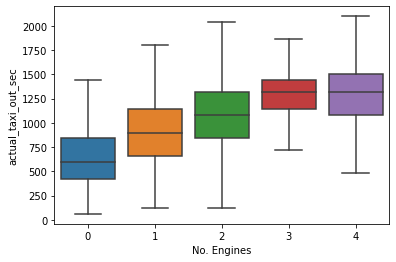

In [203]:
sns.boxplot(x="No. Engines", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='icon', ylabel='actual_taxi_out_sec'>

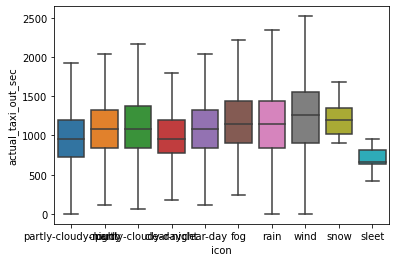

In [206]:
sns.boxplot(x="icon", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='temp_int', ylabel='actual_taxi_out_sec'>

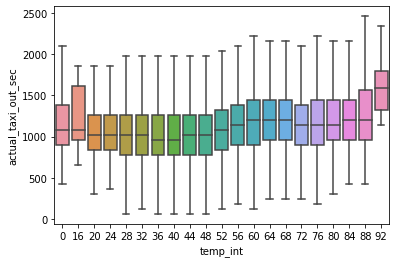

In [215]:
sns.boxplot(x="temp_int", y="actual_taxi_out_sec", data=df_w, showfliers = False)

In [218]:
df_w['temp_int'] = df_w['temperature'].fillna(0).astype(int) - df_w['temperature'].fillna(0).astype(int)%4
df_w['N_Q_dep'] = df_w['N_dep_dep'] - df_w['Q_dep_dep']

<AxesSubplot:xlabel='N_dep_dep', ylabel='actual_taxi_out_sec'>

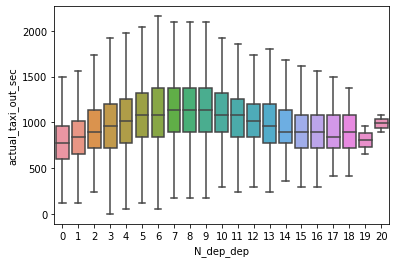

In [216]:
sns.boxplot(x="N_dep_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='Q_dep_dep', ylabel='actual_taxi_out_sec'>

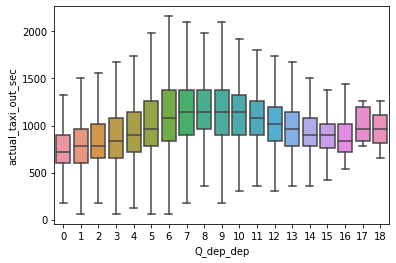

In [217]:
sns.boxplot(x="Q_dep_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='N_Q_dep', ylabel='actual_taxi_out_sec'>

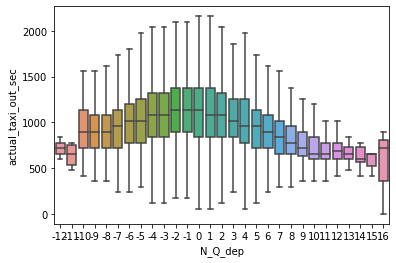

In [220]:
sns.boxplot(x="N_Q_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

In [221]:
from sklearn.tree import DecisionTreeRegressor

In [241]:
X = df_w.iloc[:,[3,4,5,10,11,15, 16, 17,19, 24,25,26,27,28,29,30,31,32,33,34,35,36,38,39]]
y = df_w['actual_taxi_out_sec']
X = X.fillna(method='ffill')

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(0.0, 1000.0)

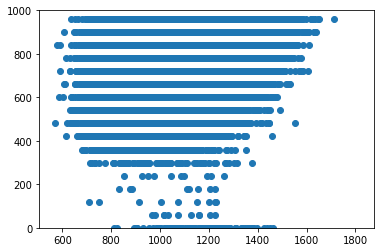

In [253]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
plt.scatter(reg.predict(X_test), y_test)
plt.ylim(0,1000)

In [247]:
 reg.coef_

array([ 7.14166092e-01,  6.73128150e-01,  7.93552422e+01, -1.29391128e-01,
        1.08188913e+02,  6.36966612e+00, -9.85238938e+00, -5.93543483e+00,
        2.18079269e+01,  8.98390764e+02, -6.60770123e-01,  5.00834910e+00,
        1.87848670e+00, -1.57570291e+00,  4.05167635e+02,  6.95436360e-01,
        9.05365742e-01,  4.83347889e+00, -2.26692509e-01,  1.33886461e+01,
        3.82771067e+01,  2.78699141e-01,  4.24646737e+03,  4.36598739e-01])

In [258]:
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing,Taxiing_date,N,Q
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,Thursday,9.0,0 days 00:09:00,0.0,0.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,Thursday,10.0,0 days 00:10:00,0.0,0.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,Thursday,11.0,0 days 00:11:00,0.0,0.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,Thursday,12.0,0 days 00:12:00,3.0,3.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,Thursday,13.0,0 days 00:13:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,Monday,18.0,0 days 00:18:00,NaN,NaN
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,Monday,14.0,0 days 00:14:00,NaN,NaN
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,Monday,10.0,0 days 00:10:00,NaN,NaN
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,Monday,20.0,0 days 00:20:00,NaN,NaN


In [306]:
df_geo['runway'] = df_geo['runway'].str.lower()
df_geo['stand'] = df_geo['stand'].str.lower()
df_apt_time['Stand'] = df_apt_time['Stand'].str.lower()
df_apt_time['Runway'] = df_apt_time['Runway'].str.lower()
df_geo = df_geo.drop_duplicates().reset_index()

<ipython-input-306-80a393da69bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['runway'] = df_geo['runway'].str.lower()
<ipython-input-306-80a393da69bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['stand'] = df_geo['stand'].str.lower()


In [307]:
def degree2m(degree):
    return (40000000/360*degree)
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)
df_geo['dist_m']=degree2m(dist(df_geo['Lat_runway'], df_geo['Lng_runway'], df_geo['Lat_stand'], df_geo['Lng_stand']))

In [314]:
df_apt_time_merg = pd.merge(df_apt_time, df_geo, left_on=['Stand', 'Runway'], right_on=['stand', 'runway'])

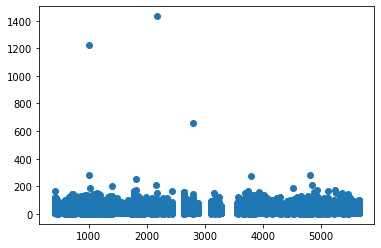

In [318]:
plt.scatter(x='dist_m', y='Taxiing', data = df_apt_time_merg)

In [337]:
df_apt_time_merg['avg_velocity'] = df_apt_time_merg['dist_m']/ (df_apt_time_merg['Taxiing']*60) 

<ipython-input-337-d74cbd41a9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_time_merg['avg_velocity'] = df_apt_time_merg['dist_m']/ (df_apt_time_merg['Taxiing']*60)


In [346]:
df_apt_time_merg[['Runway', 'Stand', 'avg_velocity']].groupby(['Runway', 'Stand']).mean().sort_values(by='avg_velocity')

avg_velocity
Runway   Stand                 
runway_3 stand_27      0.426828
         stand_62      0.431321
         stand_74      0.434977
         stand_23      0.436680
         stand_12      0.455504
...                         ...
runway_1 stand_18      5.583591
         stand_1       5.632176
runway_2 stand_65      5.752740
runway_1 stand_65      5.754356
runway_2 stand_18      5.841185

[386 rows x 1 columns]

In [347]:
df_apt_time_merg[['Runway', 'Stand', 'avg_velocity']].groupby(['Runway']).mean().sort_values(by='avg_velocity')

,avg_velocity
Runway,
runway_4,1.174528
runway_3,1.455652
runway_1,3.986324
runway_2,4.539006


In [336]:
df_apt_time_merg = df_apt_time_merg[~(df_apt_time_merg['AOBT'] == df_apt_time_merg['ATOT'])]